<a href="https://colab.research.google.com/github/PiyumaliSandunika/e18-4yp-Multimodal-Emotion-Prediction-Using-Reinforcement-Learning/blob/main/weighted_avg_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib
import librosa
import soundfile
import os
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

emotions = {'01': 'Happy', '02': 'Sad', '03': 'Angry', '04': 'Neutral'}
observed_emotions = observed_emotions = ['happiness', 'sadness', 'anger', 'neutral']

def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    if chroma:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, mel))
    return result

def predict_one(model,audio_file):
    # model = joblib.load("TrainedUsing95percCommonData&IncLearnedUsingPersAllDataBatchSize1.pkl")
    feature = extract_feature(audio_file, mfcc=True, chroma=True, mel=True)
    x = np.array([feature])
    pred = model.predict(x)
    y_pred_logits = model.predict_proba(np.array(x))
    probabilities_list = y_pred_logits.squeeze().tolist()
    # print(probabilities_list)
    # print(pred)
    return probabilities_list, pred

def predict_batch(model,folder_path):
    # model = joblib.load("TrainedUsing95percCommonData&IncLearnedUsingPersAllDataBatchSize1.pkl")
    x, y_true = [], []
    for folder in observed_emotions:
        filepath = os.path.join(folder_path, folder)
        for filename in os.listdir(filepath):
            feature = extract_feature(os.path.join(filepath, filename), mfcc=True, chroma=True, mel=True)
            x.append(feature)
            y_true.append(folder)

    y_pred_logits = model.predict_proba(np.array(x))
    print(y_pred_logits)
    print(y_true)
    return y_pred_logits, y_true



In [ ]:
pip install resampy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
import torch
import pickle
import joblib
# Assuming device is either "cpu" or "cuda:0"
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model_path = "/content/drive/MyDrive/FYP_Text/ERM_30.pkl"
text_model = joblib.load(model_path)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')


Exception ignored in: <function _xla_gc_callback at 0x7e2d5cc91000>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [ ]:
import torch

def predict_emotion_with_probabilities(sentence, model, tokenizer, device):
    # Tokenize the input sentence
    inputs = tokenizer(sentence, return_tensors="pt").to(device)

    # Perform inference
    outputs = model(**inputs)
    logits = outputs.logits.to(device)

    # Apply softmax to get probabilities
    probabilities = torch.nn.functional.softmax(logits, dim=1)

    # Convert probabilities tensor to list
    probabilities_list = probabilities.squeeze().tolist()

    # Map predicted label to emotion
    emotion_labels = ["happiness", "sadness", "anger", "neutral"]
    predicted_emotion = emotion_labels[torch.argmax(logits, dim=1).item()]

    return probabilities_list, predicted_emotion


In [ ]:

# device = "cuda:0" if torch.cuda.is_available() else "cpu"
sentence = "Yesterday was good"
audio_file = '/content/drive/MyDrive/FYP_Text/audio_dataset/happiness/Happy_out_8.wav'
model_vocal = joblib.load("/content/drive/MyDrive/FYP_Text/TrainedUsing95percCommonData&IncLearnedUsingPersAllDataBatchSize1.pkl")
# prob1, _ = predict_emotion_with_probabilities(sentence, text_model, tokenizer, device)
prob2, _ = predict_one(model_vocal,audio_file)

In [ ]:
folder_path ="/content/drive/MyDrive/FYP_Text/audio_dataset"

model_vocal = joblib.load("/content/drive/MyDrive/FYP_Text/TrainedUsing95percCommonData&IncLearnedUsingPersAllDataBatchSize1.pkl")
predict_batch(model_vocal,folder_path)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


(array([[4.97861461e-02, 9.50114420e-01, 3.25518667e-05, 6.68823306e-05],
        [1.92236099e-07, 2.41725274e-04, 1.92743191e-09, 9.99758081e-01],
        [5.70051372e-01, 4.29536356e-01, 2.03947900e-05, 3.91877007e-04],
        [1.42448689e-01, 8.55021926e-01, 8.57348033e-06, 2.52081137e-03],
        [9.76540926e-02, 9.01304612e-01, 1.02380178e-03, 1.74937086e-05],
        [1.21562986e-03, 7.16635899e-01, 1.11046230e-04, 2.82037425e-01],
        [4.46186011e-13, 3.80161287e-01, 2.86246148e-03, 6.16976252e-01],
        [7.41264893e-03, 9.51070965e-01, 8.89712391e-05, 4.14274153e-02],
        [1.23726532e-02, 6.81197439e-01, 4.31341365e-08, 3.06429865e-01],
        [2.01275275e-04, 9.91792705e-01, 2.40920077e-03, 5.59681898e-03],
        [1.74701181e-01, 8.25128398e-01, 2.47189233e-05, 1.45702004e-04],
        [3.61156529e-04, 9.69990200e-01, 4.14811393e-04, 2.92338326e-02],
        [1.09123366e-06, 9.99834098e-01, 1.51526052e-04, 1.32845348e-05],
        [1.44976482e-01, 1.99903645e-0

In [ ]:
print(prob1)
print(prob2)

[0.9999516010284424, 3.439402280491777e-05, 3.1837571441428736e-06, 1.077303932106588e-05]
[5.047014032734361e-10, 0.9999999950462839, 5.143119161296012e-11, 4.397583581577403e-09]


In [ ]:
# def ensemble_predictions(probabilities1,probabilities2, model_weights=None):

#     # Apply model-wise weights if provided
#     if model_weights:
#         probabilities1_ = [p1 * w for p1, w in zip(probabilities1, model_weights[0])]
#         probabilities2_ = [p2 * w for p2, w in zip(probabilities2, model_weights[1])]

#     # # Apply class-wise weights if provided
#     # if class_weights:
#     #     probabilities1 = [p1 * w for p1, w in zip(probabilities1, class_weights)]
#     #     probabilities2 = [p2 * w for p2, w in zip(probabilities2, class_weights)]

#     # Calculate ensemble probabilities by averaging
#     ensemble_probabilities = [(p1 + p2) / 2 for p1, p2 in zip(probabilities1_, probabilities2_)]

#     # Map ensemble probabilities to emotion labels
#     emotion_labels = ["happiness", "sadness", "anger", "neutral"]
#     predicted_emotion = emotion_labels[np.argmax(ensemble_probabilities)]

#     return probabilities1, probabilities2, ensemble_probabilities, predicted_emotion



In [ ]:
def ensemble_predictions(probabilities1, probabilities2, user_labels, model_weights, learning_rate=0.1):
    # Apply model-wise weights if provided
    # if model_weights:
    # probabilities1_ = [p1 * w for p1, w in zip(probabilities1, model_weights[0])]
    # probabilities2_ = [p2 * w for p2, w in zip(probabilities2, model_weights[1])]

    probabilities1_ = [p1 * model_weights[0] for p1 in probabilities1]
    probabilities2_ = [p2 * model_weights[1] for p2 in probabilities2]
    # Calculate ensemble probabilities by averaging
    ensemble_probabilities = [(p1 + p2) / 2 for p1, p2 in zip(probabilities1_, probabilities2_)]

    # Map ensemble probabilities to emotion labels
    emotion_labels = ["happiness", "sadness", "anger", "neutral"]
    predicted_emotion1 = emotion_labels[np.argmax(probabilities1_)]
    print(predicted_emotion1)
    predicted_emotion2 = emotion_labels[np.argmax(probabilities2_)]
    print(predicted_emotion2)
    predicted_emotion  = emotion_labels[np.argmax(ensemble_probabilities)]
    # Update model weights using online learning
    # if model_weights:
    #     # Update weights based on whether the predicted emotion matches the user-provided label
    #     for i, (p1, p2, user_label) in enumerate(zip(probabilities1, probabilities2, user_labels)):
    #         print(user_label)
    #         print(predicted_emotion1)
    if predicted_emotion1 == user_labels:

        # Increase weights for correct predictions
        model_weights[0] += learning_rate
    else:
        model_weights[0] -= learning_rate

    if predicted_emotion2 == user_labels:
        model_weights[1] += learning_rate
    else:
        model_weights[1] -= learning_rate


    return probabilities1, probabilities2, ensemble_probabilities, predicted_emotion, model_weights


In [ ]:
# Example usage with model and class weights
# sentence = "This is a test sentence."
model_weights = [0.5,0.5]  # Example weights for each model
# class_weights = [1.0, 1.0, 1.0,1.0]  # Example weights for each class
probabilities1_new, probabilities2_new, ensemble_probabilities, predicted_emotion,new_model_weights = ensemble_predictions(prob1,prob2, 'happiness',model_weights,0.01)
print("Probabilities (Model 1):", probabilities1_new)
print("Probabilities (Model 2):", probabilities2_new)
print("Ensemble Probabilities:", ensemble_probabilities)
print("Ensemble Predicted Emotion:", predicted_emotion)
print(new_model_weights)

happiness
sadness
Probabilities (Model 1): [0.9999516010284424, 3.439402280491777e-05, 3.1837571441428736e-06, 1.077303932106588e-05]
Probabilities (Model 2): [5.047014032734361e-10, 0.9999999950462839, 5.143119161296012e-11, 4.397583581577403e-09]
Ensemble Probabilities: [0.24998790038328594, 0.2500085972672722, 7.959521438336217e-07, 2.6943592261618643e-06]
Ensemble Predicted Emotion: sadness
[0.51, 0.49]


In [ ]:
# import os

# emotions = {"happiness": 0, "sadness": 1, "anger": 2, "neutral": 3}
# observed_emotions = ['Happy', 'Sad', 'Angry', 'Neutral']
# model_weights = [0.5,0.5]
# x, y_label = [], []
# folder_path = "/content/drive/MyDrive/FYP_Text/audio_dataset"
# for folder in observed_emotions:
#     filepath = os.path.join(folder_path, folder)
#     print(filepath)
#     for filename in os.listdir(filepath):
#         # print(os.path.join(filepath, filename))
#         hj = os.path.join(filepath, filename)
#         try:

#             transcribed_text = audio_to_text(hj)
#             if transcribed_text:
#                 print("Transcribed Text:", transcribed_text)
#                 # probabilities1_new, probabilities2_new, ensemble_probabilities, predicted_emotion,new_model_weights = ensemble_predictions(prob1,prob2, folder,model_weights,0.01)
#                 # print("Probabilities (Model 1):", probabilities1_new)
#                 # print("Probabilities (Model 2):", probabilities2_new)
#                 # print("Ensemble Probabilities:", ensemble_probabilities)
#                 # print("Ensemble Predicted Emotion:", predicted_emotion)
#                 # print(new_model_weights)

#                 # x.append(transcribed_text)
#                 # y_label.append(folder)
#         except:
#             print("Error occurred while processing:", hj)
#         # feature = extract_feature(os.path.join(filepath, filename), mfcc=True, chroma=True, mel=True)
#         # x.append(feature)
#         # y_true.append(folder)

In [ ]:
import os
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer
import torch
import pickle
import joblib
# Assuming device is either "cpu" or "cuda:0"
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model_path = "/content/drive/MyDrive/FYP_Text/ERM_30.pkl"
text_model = joblib.load(model_path)
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
vocal_model = joblib.load("/content/drive/MyDrive/FYP_Text/TrainedUsing95percCommonData&IncLearnedUsingPersAllDataBatchSize1.pkl")

emotions = {"happiness": 0, "sadness": 1, "anger": 2, "neutral": 3}
observed_emotions = ['happiness', 'sadness', 'anger', 'neutral']

x, y_label = [], []
folder_path = "/content/drive/MyDrive/FYP_Text/audio_dataset2"
for folder in observed_emotions:
    filepath = os.path.join(folder_path, folder)
    print(filepath)
    for filename in os.listdir(filepath):
        # print(os.path.join(filepath, filename))
        selected_audio = os.path.join(filepath, filename)
        try:

            transcribed_text = audio_to_text(selected_audio)

            if transcribed_text:
                probabilities1, _ = predict_emotion_with_probabilities(transcribed_text, text_model, tokenizer, device)
                probabilities2, _ = predict_one(model_vocal,selected_audio)
                probabilities1_new, probabilities2_new, ensemble_probabilities, predicted_emotion,weights = ensemble_predictions(probabilities1,probabilities2, folder,model_weights,0.01)
                print("Probabilities (Model 1):", probabilities1_new)
                print("Probabilities (Model 2):", probabilities2_new)
                print("Ensemble Probabilities:", ensemble_probabilities)
                print("Ensemble Predicted Emotion:", predicted_emotion)
                print(weights)
                # print("Transcribed Text:", transcribed_text)
                # x.append(transcribed_text)
                # y_label.append(folder)

        except:
            print("Error occurred while processing:", selected_audio)
        # feature = extract_feature(os.path.join(filepath, filename), mfcc=True, chroma=True, mel=True)
        # x.append(feature)
        # y_true.append(folder)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


/content/drive/MyDrive/FYP_Text/audio_dataset2/happiness
[0.14244868895147347, 0.8550219261997825, 8.573480332911055e-06, 0.0025208113684110373]
['Happy']
happiness
sadness
Probabilities (Model 1): [0.99992835521698, 4.421417543198913e-06, 2.407367901469115e-06, 6.479084549937397e-05]
Probabilities (Model 2): [0.14244868895147347, 0.8550219261997825, 8.573480332911055e-06, 0.0025208113684110373]
Ensemble Probabilities: [0.2898816593734409, 0.2094814993804202, 2.714381496437833e-06, 0.0006341204508630446]
Ensemble Predicted Emotion: happiness
[0.52, 0.48]
[0.049786146050709155, 0.9501144197519716, 3.255186674379077e-05, 6.688233057551054e-05]
['Happy']
happiness
sadness
Probabilities (Model 1): [0.9999876022338867, 3.502062099869363e-06, 1.5985957588782185e-06, 7.352874490607064e-06]
Probabilities (Model 2): [0.049786146050709155, 0.9501144197519716, 3.255186674379077e-05, 6.688233057551054e-05]
Ensemble Probabilities: [0.27194545163298073, 0.22802837127661915, 8.22808291581812e-06, 1.7

In [ ]:
# Assuming device is either "cpu" or "cuda:0"
device = "cuda:0" if torch.cuda.is_available() else "cpu"



In [ ]:
import pickle
import numpy as np
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
# Load pretrained models for vocal tone classification and text classification
vocal_tone_model = joblib.load("TrainedUsing95percCommonData&IncLearnedUsingPersAllDataBatchSize1.pkl")
text_model = joblib.load("/content/drive/MyDrive/FYP_Text/emotion_text_classification_model.pkl")
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch

# Define Fusion Module for ensembling
class FusionModule:
    def __init__(self, vocal_tone_model, text_model, tokenizer):
        self.vocal_tone_model = vocal_tone_model
        self.text_model = text_model
        self.tokenizer = tokenizer

    def combine_predictions(self, vocal_tone_features, text_features):
        # Predictions from vocal tone model
        vocal_tone_prediction = self.vocal_tone_model.predict(vocal_tone_features.reshape(1, -1))

        # Predictions from text model
        text_inputs = self.tokenizer.encode_plus(
            text_features,
            add_special_tokens=True,
            max_length=512,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt'
        )
        text_inputs = {k: v.squeeze(0) for k, v in text_inputs.items()}
        text_prediction = self.text_model(**text_inputs)[0]
        text_prediction = torch.argmax(text_prediction).item()

        # Combine predictions (e.g., simple averaging)
        fused_prediction = (vocal_tone_prediction + text_prediction) / 2  # Simple averaging

        return fused_prediction

In [ ]:
# Predictions from vocal tone model
vocal_tone_features = extract_feature('Happy_out_8.wav', mfcc=True, chroma=True, mel=True)
vocal_tone_prediction = vocal_tone_model.predict(vocal_tone_features.reshape(1, -1))

# # Predictions from text model
# text_inputs = self.tokenizer.encode_plus(
#     text_features,
#     add_special_tokens=True,
#     max_length=512,
#     padding='max_length',
#     return_attention_mask=True,
#     return_tensors='pt'
# )
# text_inputs = {k: v.squeeze(0) for k, v in text_inputs.items()}
# text_prediction = self.text_model(**text_inputs)[0]
# text_prediction = torch.argmax(text_prediction).item()

# # Combine predictions (e.g., simple averaging)
# fused_prediction = (vocal_tone_prediction + text_prediction) / 2  # Simple averaging


In [ ]:
text_features = tokenizer('This is great', return_tensors="pt").to(device)

In [ ]:
# Example code to get text features
sentence = "I am feeling happy today!"
text_features = tokenizer(sentence, return_tensors="pt", padding=True, truncation=True)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


# **Vocal tone --> Text conversion**

In [ ]:
import speech_recognition as sr

def audio_to_text(audio_file):
    # Initialize the recognizer
    recognizer = sr.Recognizer()

    # Load audio file
    with sr.AudioFile(audio_file) as source:
        # Adjust for ambient noise
        recognizer.adjust_for_ambient_noise(source)

        # Listen for speech and transcribe
        audio_data = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio_data)
            return text
        except sr.UnknownValueError:
            print("Speech Recognition could not understand audio")
            return None
        except sr.RequestError as e:
            print("Could not request results from Speech Recognition service; {0}".format(e))
            return None


In [ ]:
%pip install SpeechRecognition


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 46.6 MB/s eta 0:00:00


In [ ]:
import os

emotions = {"happiness": 0, "sadness": 1, "anger": 2, "neutral": 3}
observed_emotions = ['Happy', 'Sad', 'Angry', 'Neutral']

x, y_label = [], []
folder_path = "C:/Users/HP/Downloads/audio_dataset"
for folder in observed_emotions:
    filepath = os.path.join(folder_path, folder)
    print(filepath)
    for filename in os.listdir(filepath):
        # print(os.path.join(filepath, filename))
        hj = os.path.join(filepath, filename)
        try:

            transcribed_text = audio_to_text(hj)
            if transcribed_text:
                print("Transcribed Text:", transcribed_text)
                x.append(transcribed_text)
                y_label.append(folder)
        except:
            print("Error occurred while processing:", hj)
        # feature = extract_feature(os.path.join(filepath, filename), mfcc=True, chroma=True, mel=True)
        # x.append(feature)
        # y_true.append(folder)

C:/Users/HP/Downloads/audio_dataset\Happy
Transcribed Text: it's such a great day spend a time
Transcribed Text: office recording let's
Transcribed Text: Sunny Deol beaches you happiness
Transcribed Text: very very beautiful day I love this yeah of course it's a very very happy
Transcribed Text: very very funny right yeah he is a very very funny person I like that I
Transcribed Text: Google you are really cool person I like you I want to
Transcribed Text: yes of course it's really nice I do like that I want
Transcribed Text: understand that your school completing
Transcribed Text: give me a sense of achievement feeling the worth of the son of my skin makes
Transcribed Text: money in my pocket that I forgot about places of Christ
Transcribed Text: it's really good but since you thank you from some
Transcribed Text: always make me happy sing my favourite man performs live version
Transcribed Text: feel appreciate find the money in my pocket that I forgot about
Transcribed Text: I can't h

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(x, y_label)), columns=['content', 'emotion'])

In [ ]:
df

,content,emotion
0,it's such a great day spend a time,Happy
1,office recording let's,Happy
2,Sunny Deol beaches you happiness,Happy
3,very very beautiful day I love this yeah of co...,Happy
4,very very funny right yeah he is a very very f...,Happy
...,...,...
83,Yadav about a situation the weather today's ne...,Neutral
84,contact DC and see what happens today size in,Neutral
85,I am feeling OK nothing special happen,Neutral
86,parrot non spinal about today's plans Just Ano...,Neutral


In [ ]:
df.to_csv("transcribed.csv", index=False)

In [ ]:
# # Assuming have functions to load text and audio data, and to perform speech-to-text conversion and feature extraction

# # Step 1: Load data
# text_data = load_text_data("text_samples.csv")
# audio_data = load_audio_data("audio_samples.wav")

# # Step 2: Convert audio data into text
# converted_text_data = []
# for audio_sample in audio_data:
#     converted_text = audio_to_text(audio_sample)
#     converted_text_data.append(converted_text)

# # Step 3: Extract features
# text_features = extract_text_features(text_data)
# audio_features = extract_audio_features(converted_text_data)

# # Step 4: Make initial predictions
# probabilities1, probabilities2 = model_predictions(text_features, audio_features)

# # Step 5: Gather user feedback or ground truth labels
# user_labels = get_user_labels(text_data, audio_data)  # Assuming you have a way to get user feedback

# # Step 6: Update model weights based on feedback
# updated_probabilities1, updated_probabilities2, ensemble_probabilities, predicted_emotion, model_weights = ensemble_predictions(probabilities1, probabilities2, user_labels, model_weights, learning_rate=0.1)

# # Step 7: Repeat for each sample
# # This step depends on the size of your dataset and the available computational resources

# # Step 8: Evaluate performance on a validation set
# validation_text_data = load_text_data("validation_text.csv")
# validation_audio_data = load_audio_data("validation_audio.wav")
# validation_user_labels = get_user_labels(validation_text_data, validation_audio_data)
# validation_text_features = extract_text_features(validation_text_data)
# validation_audio_features = extract_audio_features(validation_audio_data)
# validation_probabilities1, validation_probabilities2 = model_predictions(validation_text_features, validation_audio_features)
# accuracy = evaluate(validation_probabilities1, validation_probabilities2, validation_user_labels)
# print("Accuracy:", accuracy)


In [ ]:
weight_m1 = []

In [ ]:
import pandas as pd
df = pd.read_csv("res.csv")

In [ ]:
df['model1']

0     0.51
1     0.52
2     0.53
3     0.54
4     0.55
5     0.54
6     0.53
7     0.52
8     0.53
9     0.52
10    0.53
11    0.52
Name: model1, dtype: float64

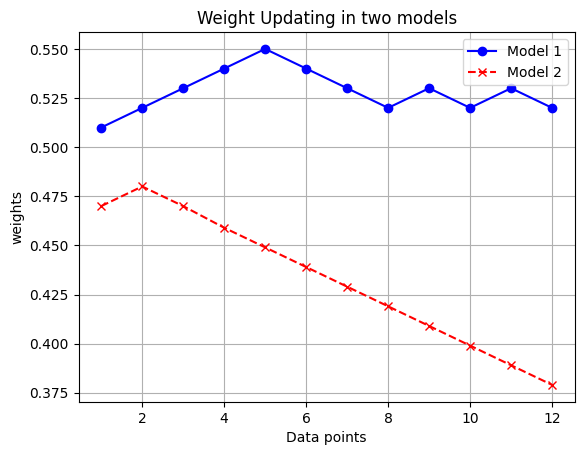

In [ ]:
import matplotlib.pyplot as plt

# Example lists of data
x = [i for i in range(1,13)]
y1 = df['model1']
y2 = df['model2']

# Plot the first set of data
plt.plot(x, y1, label='Model 1', color='blue', marker='o')

# Plot the second set of data
plt.plot(x, y2, label='Model 2', color='red', linestyle='--', marker='x')

# Add labels and legend
plt.xlabel('Data points')
plt.ylabel('weights')
plt.title('Weight Updating in two models')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
